# Tent Map Dynamical System Analysis

The tent map is a simple yet fascinating dynamical system that exhibits chaotic behavior. It's defined as:

$$f(x) = \begin{cases} 
\mu x & \text{if } 0 \leq x \leq \frac{1}{2} \\
\mu(1-x) & \text{if } \frac{1}{2} < x \leq 1
\end{cases}$$

where $\mu$ is the parameter and $x \in [0,1]$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## 1. Tent Map Implementation

In [4]:
def tent_map(x, mu):
    """
    Tent map function: f(x) = mu*x if x <= 0.5, else mu*(1-x)
    
    Parameters:
    x : float or array-like, values in [0,1]
    mu : float, parameter (typically in [0,2])
    
    Returns:
    float or array-like, mapped values
    """
    return np.where(x <= 0.5, mu * x, mu * (1 - x))

def iterate_tent_map(x0, mu, n_iterations):
    """
    Iterate the tent map starting from x0
    
    Parameters:
    x0 : float, initial condition
    mu : float, parameter
    n_iterations : int, number of iterations
    
    Returns:
    array, sequence of iterations
    """
    trajectory = np.zeros(n_iterations + 1)
    trajectory[0] = x0
    
    for i in range(n_iterations):
        trajectory[i + 1] = tent_map(trajectory[i], mu)
    
    return trajectory

## 2. Visualization of the Tent Map Function

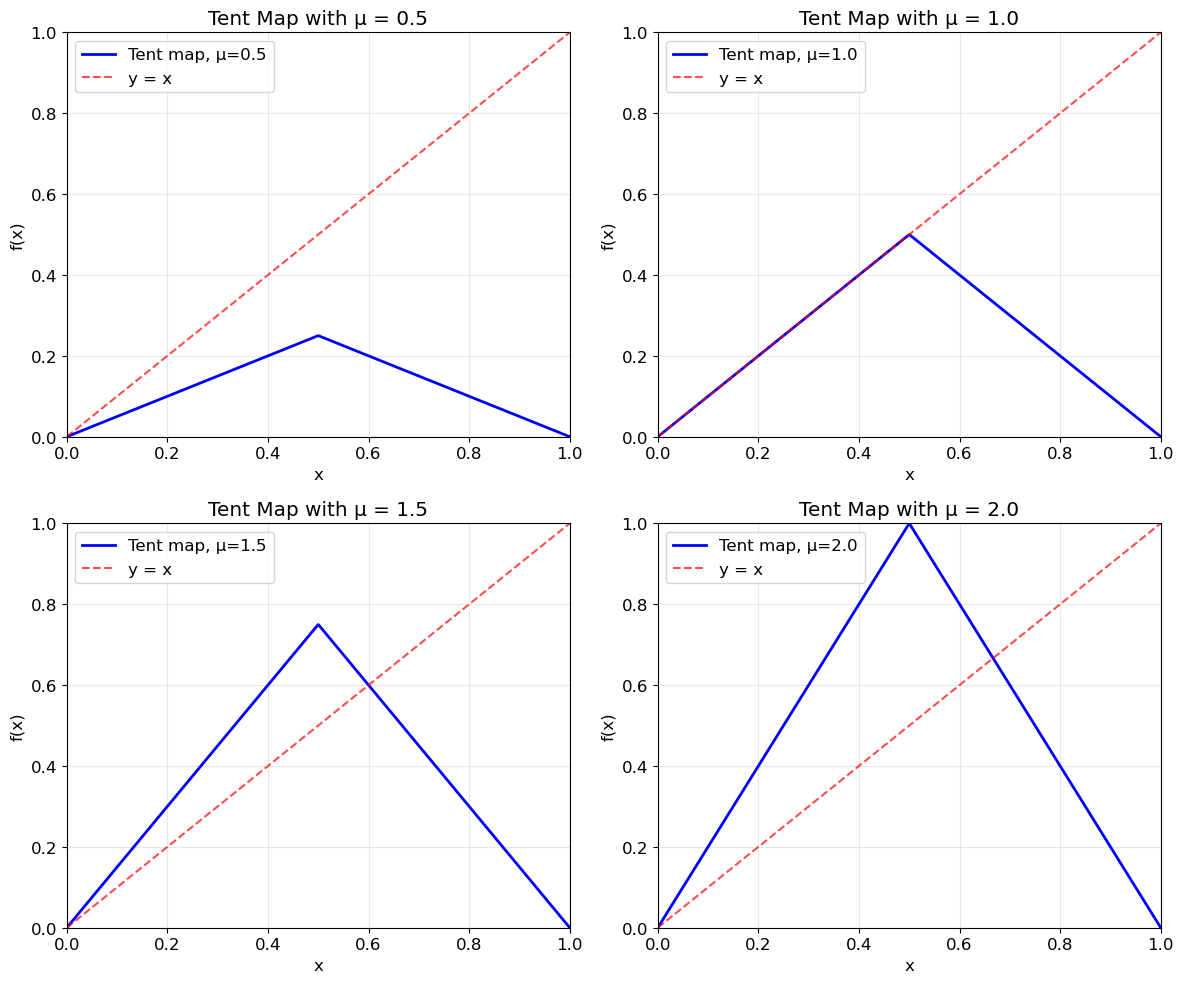

In [5]:
# Plot the tent map for different parameter values
x = np.linspace(0, 1, 1000)
mu_values = [0.5, 1.0, 1.5, 2.0]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, mu in enumerate(mu_values):
    y = tent_map(x, mu)
    
    axes[i].plot(x, y, 'b-', linewidth=2, label=f'Tent map, μ={mu}')
    axes[i].plot(x, x, 'r--', alpha=0.7, label='y = x')
    axes[i].set_xlim(0, 1)
    axes[i].set_ylim(0, max(1, mu/2))
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('f(x)')
    axes[i].set_title(f'Tent Map with μ = {mu}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Time Series Analysis

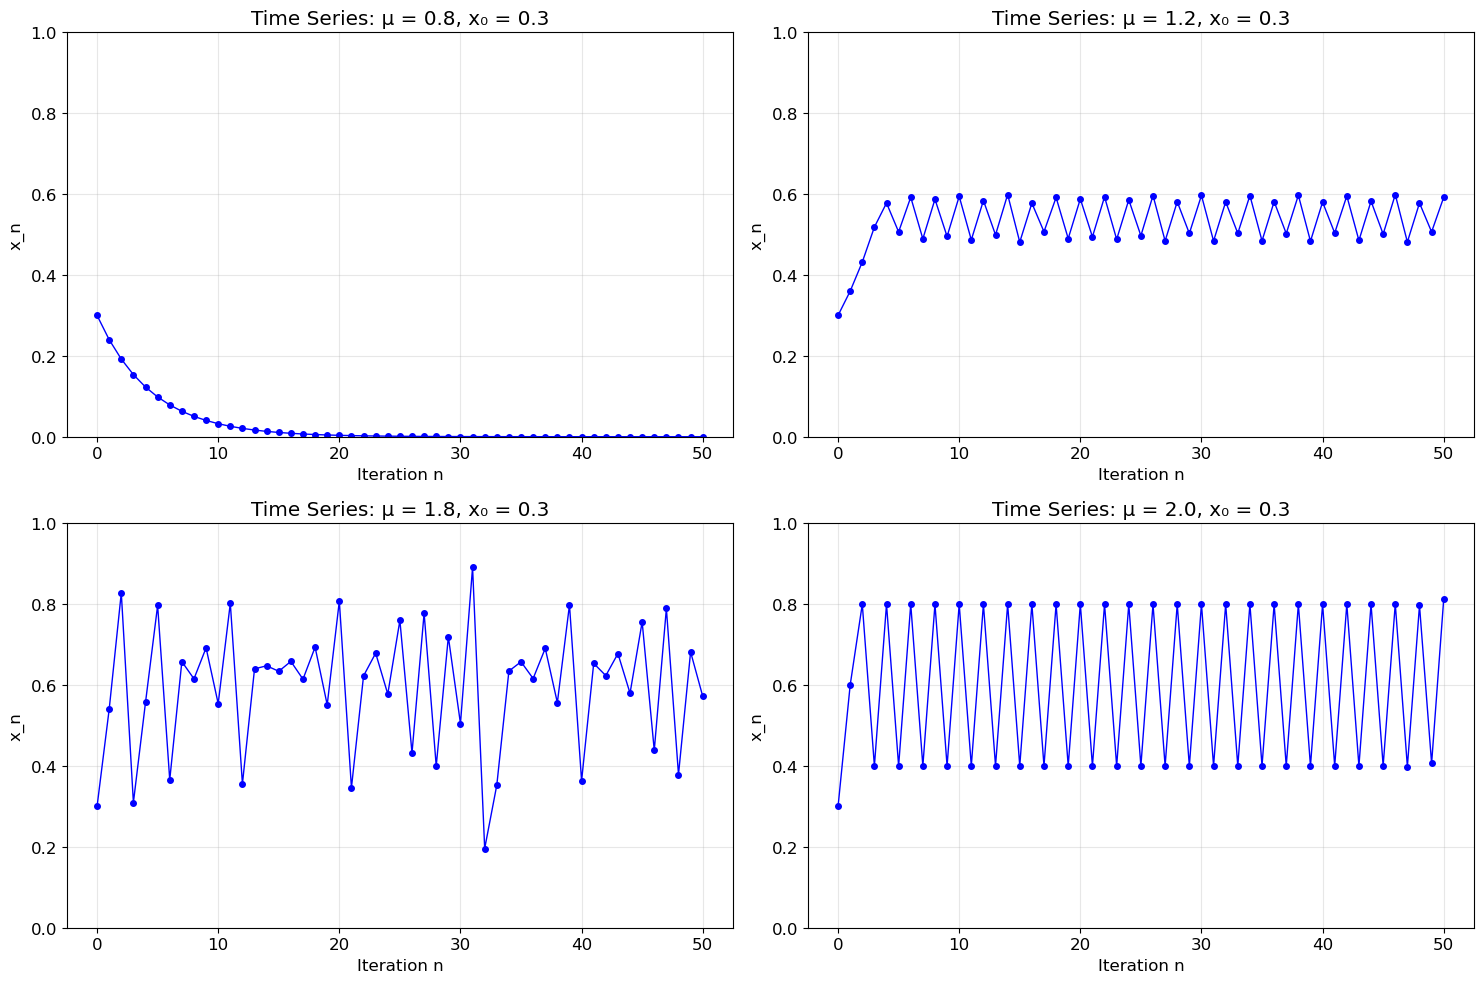

In [6]:
# Generate time series for different parameter values
x0 = 0.3  # Initial condition
n_iter = 50
mu_values = [0.8, 1.2, 1.8, 2.0]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, mu in enumerate(mu_values):
    trajectory = iterate_tent_map(x0, mu, n_iter)
    
    axes[i].plot(range(len(trajectory)), trajectory, 'bo-', markersize=4, linewidth=1)
    axes[i].set_xlabel('Iteration n')
    axes[i].set_ylabel('x_n')
    axes[i].set_title(f'Time Series: μ = {mu}, x₀ = {x0}')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

## 4. Cobweb Plot (Graphical Iteration)

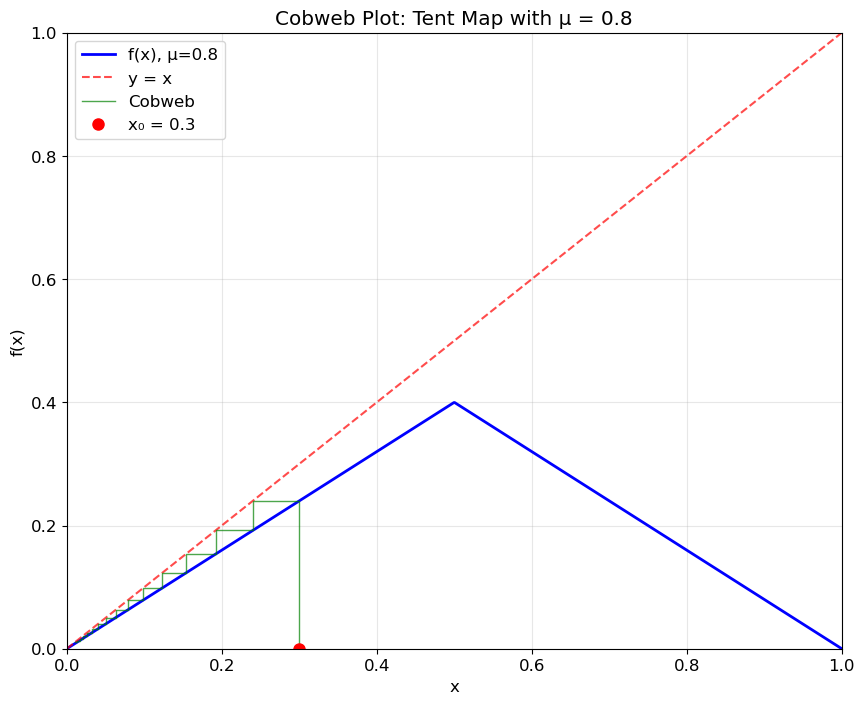

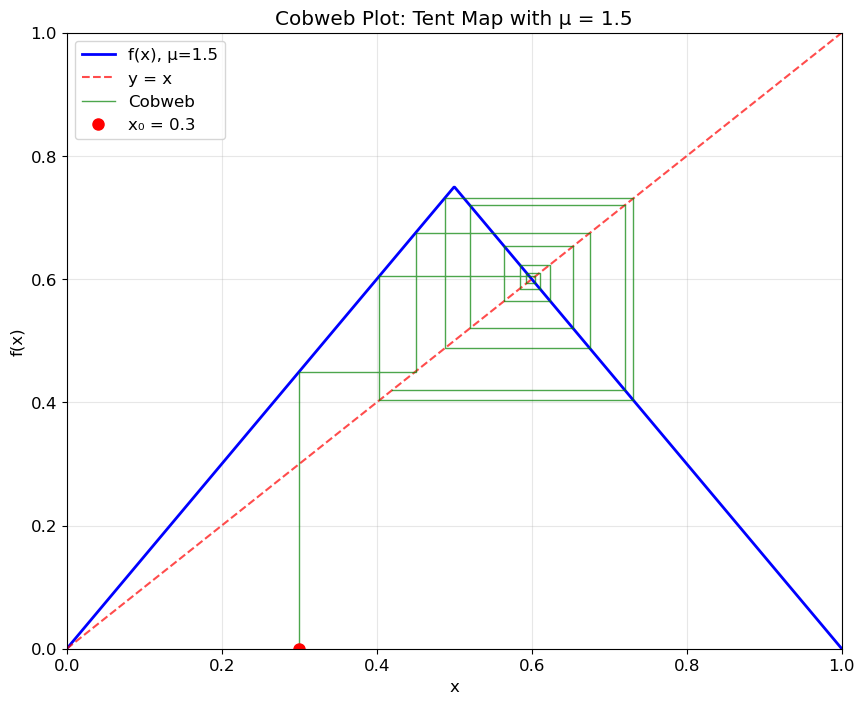

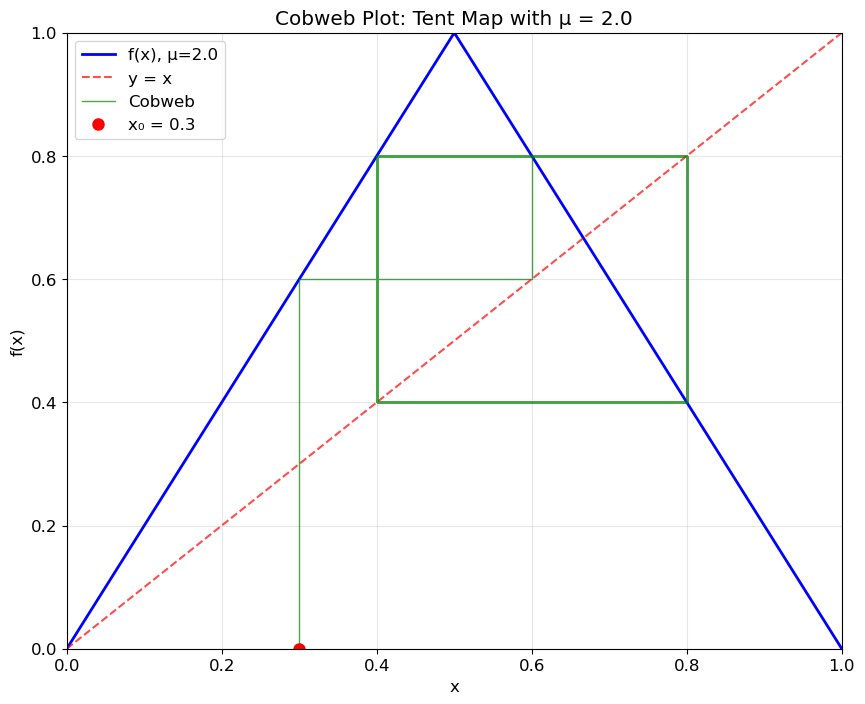

In [7]:
def cobweb_plot(mu, x0, n_iterations=20):
    """
    Create a cobweb plot for the tent map
    """
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Plot the function
    x = np.linspace(0, 1, 1000)
    y = tent_map(x, mu)
    ax.plot(x, y, 'b-', linewidth=2, label=f'f(x), μ={mu}')
    ax.plot(x, x, 'r--', alpha=0.7, label='y = x')
    
    # Generate cobweb
    x_current = x0
    cobweb_x = [x_current]
    cobweb_y = [0]
    
    for i in range(n_iterations):
        # Vertical line to function
        y_next = tent_map(x_current, mu)
        cobweb_x.extend([x_current, x_current])
        cobweb_y.extend([cobweb_y[-1], y_next])
        
        # Horizontal line to y=x
        cobweb_x.extend([x_current, y_next])
        cobweb_y.extend([y_next, y_next])
        
        x_current = y_next
    
    ax.plot(cobweb_x, cobweb_y, 'g-', alpha=0.7, linewidth=1, label='Cobweb')
    ax.plot(x0, 0, 'ro', markersize=8, label=f'x₀ = {x0}')
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, max(1, mu/2))
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title(f'Cobweb Plot: Tent Map with μ = {mu}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.show()

# Create cobweb plots for different parameters
for mu in [0.8, 1.5, 2.0]:
    cobweb_plot(mu, 0.3, 15)

## 5. Fixed Point Analysis

Fixed points satisfy $f(x^*) = x^*$. For the tent map:
- When $x^* \leq 0.5$: $\mu x^* = x^* \Rightarrow x^* = 0$ (if $\mu \neq 1$)
- When $x^* > 0.5$: $\mu(1-x^*) = x^* \Rightarrow x^* = \frac{\mu}{\mu + 1}$

In [9]:
def find_fixed_points(mu):
    """
    Find fixed points of the tent map for given parameter mu
    """
    fixed_points = []
    
    # x* = 0 is always a fixed point
    fixed_points.append(0)
    
    # Non-trivial fixed point: x* = mu/(mu+1)
    if mu > 0:
        x_star = mu / (mu + 1)
        if 0 < x_star <= 1:
            fixed_points.append(x_star)
    
    return fixed_points

def analyze_stability(mu, x_star):
    """
    Analyze stability of fixed point using derivative
    For tent map: f'(x) = mu if x < 0.5, -mu if x > 0.5
    """
    if x_star == 0:
        derivative = mu  # At x=0, we're on the left branch
    elif x_star < 0.5:
        derivative = mu
    else:
        derivative = -mu
    
    if abs(derivative) < 1:
        return "Stable"
    elif abs(derivative) > 1:
        return "Unstable"
    else:
        return "Marginally stable"

# Analyze fixed points for different parameter values
mu_range = np.linspace(0.1, 2.5, 25)
analysis_data = []

for mu in mu_range:
    fixed_points = find_fixed_points(mu)
    for fp in fixed_points:
        stability = analyze_stability(mu, fp)
        analysis_data.append({
            'mu': mu,
            'fixed_point': fp,
            'stability': stability
        })

# Display analysis
df = pd.DataFrame(analysis_data)
print("Fixed Point Analysis:")
print(df.head(20))

Fixed Point Analysis:
     mu  fixed_point stability
0   0.1     0.000000    Stable
1   0.1     0.090909    Stable
2   0.2     0.000000    Stable
3   0.2     0.166667    Stable
4   0.3     0.000000    Stable
5   0.3     0.230769    Stable
6   0.4     0.000000    Stable
7   0.4     0.285714    Stable
8   0.5     0.000000    Stable
9   0.5     0.333333    Stable
10  0.6     0.000000    Stable
11  0.6     0.375000    Stable
12  0.7     0.000000    Stable
13  0.7     0.411765    Stable
14  0.8     0.000000    Stable
15  0.8     0.444444    Stable
16  0.9     0.000000    Stable
17  0.9     0.473684    Stable
18  1.0     0.000000    Stable
19  1.0     0.500000    Stable


## 6. Bifurcation Analysis

Generating bifurcation diagram...


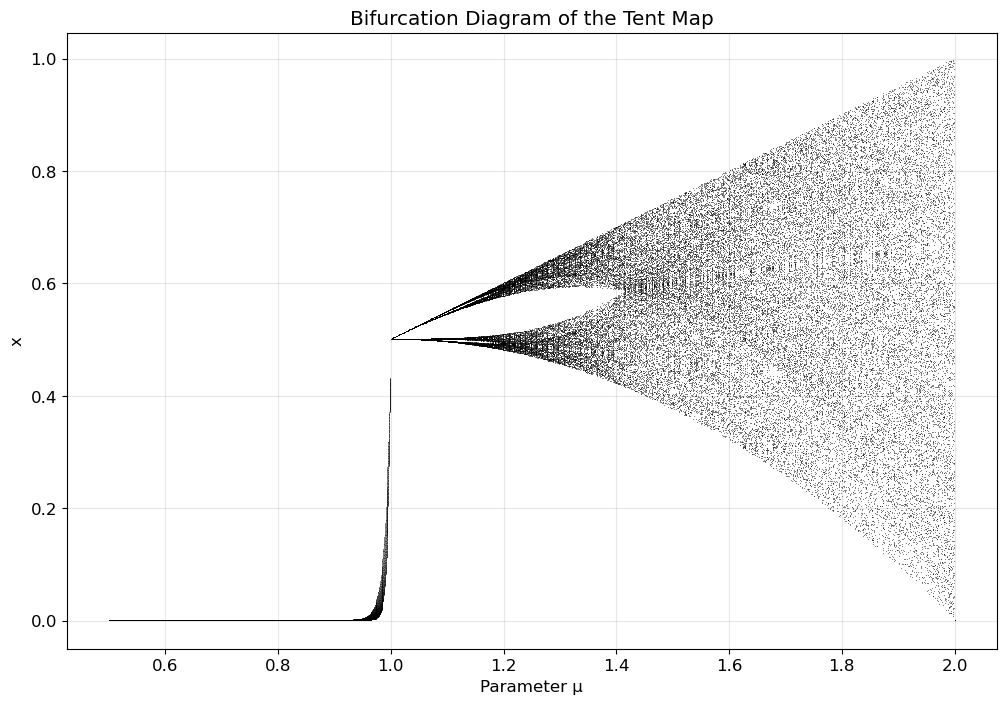

In [10]:
def bifurcation_diagram(mu_min=0.5, mu_max=2.0, n_mu=1000, n_transient=100, n_plot=100):
    """
    Generate bifurcation diagram for the tent map
    """
    mu_values = np.linspace(mu_min, mu_max, n_mu)
    x0 = 0.5  # Initial condition
    
    mu_plot = []
    x_plot = []
    
    for mu in mu_values:
        # Skip transient behavior
        trajectory = iterate_tent_map(x0, mu, n_transient + n_plot)
        
        # Plot the last n_plot points
        for x in trajectory[-n_plot:]:
            mu_plot.append(mu)
            x_plot.append(x)
    
    return np.array(mu_plot), np.array(x_plot)

# Generate bifurcation diagram
print("Generating bifurcation diagram...")
mu_bif, x_bif = bifurcation_diagram()

plt.figure(figsize=(12, 8))
plt.plot(mu_bif, x_bif, ',k', alpha=0.5, markersize=0.1)
plt.xlabel('Parameter μ')
plt.ylabel('x')
plt.title('Bifurcation Diagram of the Tent Map')
plt.grid(True, alpha=0.3)
plt.show()

## 7. Lyapunov Exponent Calculation

The Lyapunov exponent measures the rate of divergence of nearby trajectories:
$$\lambda = \lim_{n \to \infty} \frac{1}{n} \sum_{i=0}^{n-1} \ln|f'(x_i)|$$

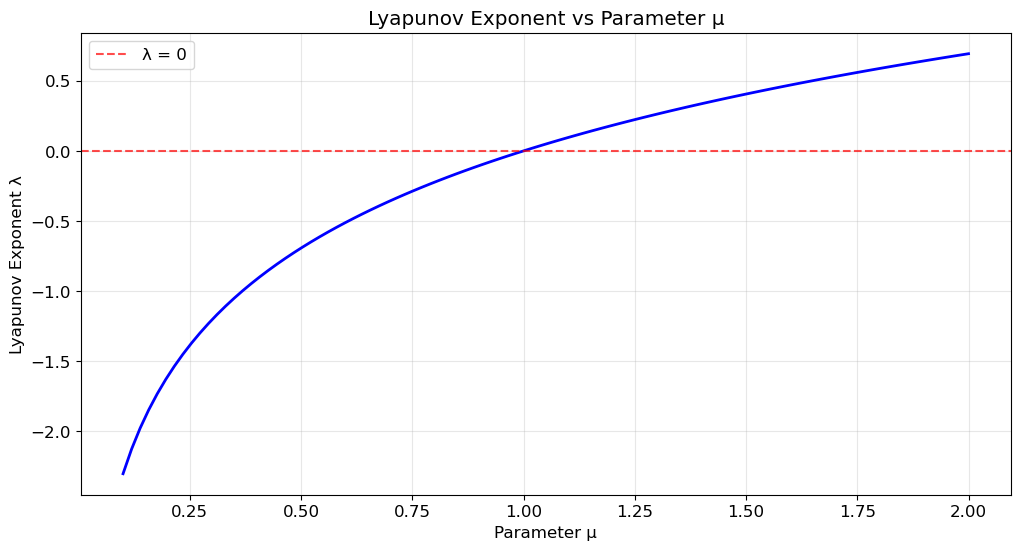

Chaotic behavior (λ > 0) occurs approximately for μ > 1.002


In [11]:
def tent_map_derivative(x, mu):
    """
    Derivative of the tent map
    """
    return np.where(x < 0.5, mu, -mu)

def lyapunov_exponent(mu, x0=0.3, n_iterations=10000):
    """
    Calculate Lyapunov exponent for the tent map
    """
    trajectory = iterate_tent_map(x0, mu, n_iterations)
    
    # Calculate sum of log derivatives
    log_derivatives = np.log(np.abs(tent_map_derivative(trajectory[:-1], mu)))
    
    # Filter out any infinite values (shouldn't happen for tent map)
    log_derivatives = log_derivatives[np.isfinite(log_derivatives)]
    
    return np.mean(log_derivatives)

# Calculate Lyapunov exponents for different parameter values
mu_values = np.linspace(0.1, 2.0, 100)
lyapunov_values = [lyapunov_exponent(mu) for mu in mu_values]

plt.figure(figsize=(12, 6))
plt.plot(mu_values, lyapunov_values, 'b-', linewidth=2)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7, label='λ = 0')
plt.xlabel('Parameter μ')
plt.ylabel('Lyapunov Exponent λ')
plt.title('Lyapunov Exponent vs Parameter μ')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Find chaotic regime (λ > 0)
chaotic_mu = mu_values[np.array(lyapunov_values) > 0]
if len(chaotic_mu) > 0:
    print(f"Chaotic behavior (λ > 0) occurs approximately for μ > {chaotic_mu[0]:.3f}")
else:
    print("No chaotic behavior detected in this parameter range")

## 8. Sensitivity to Initial Conditions

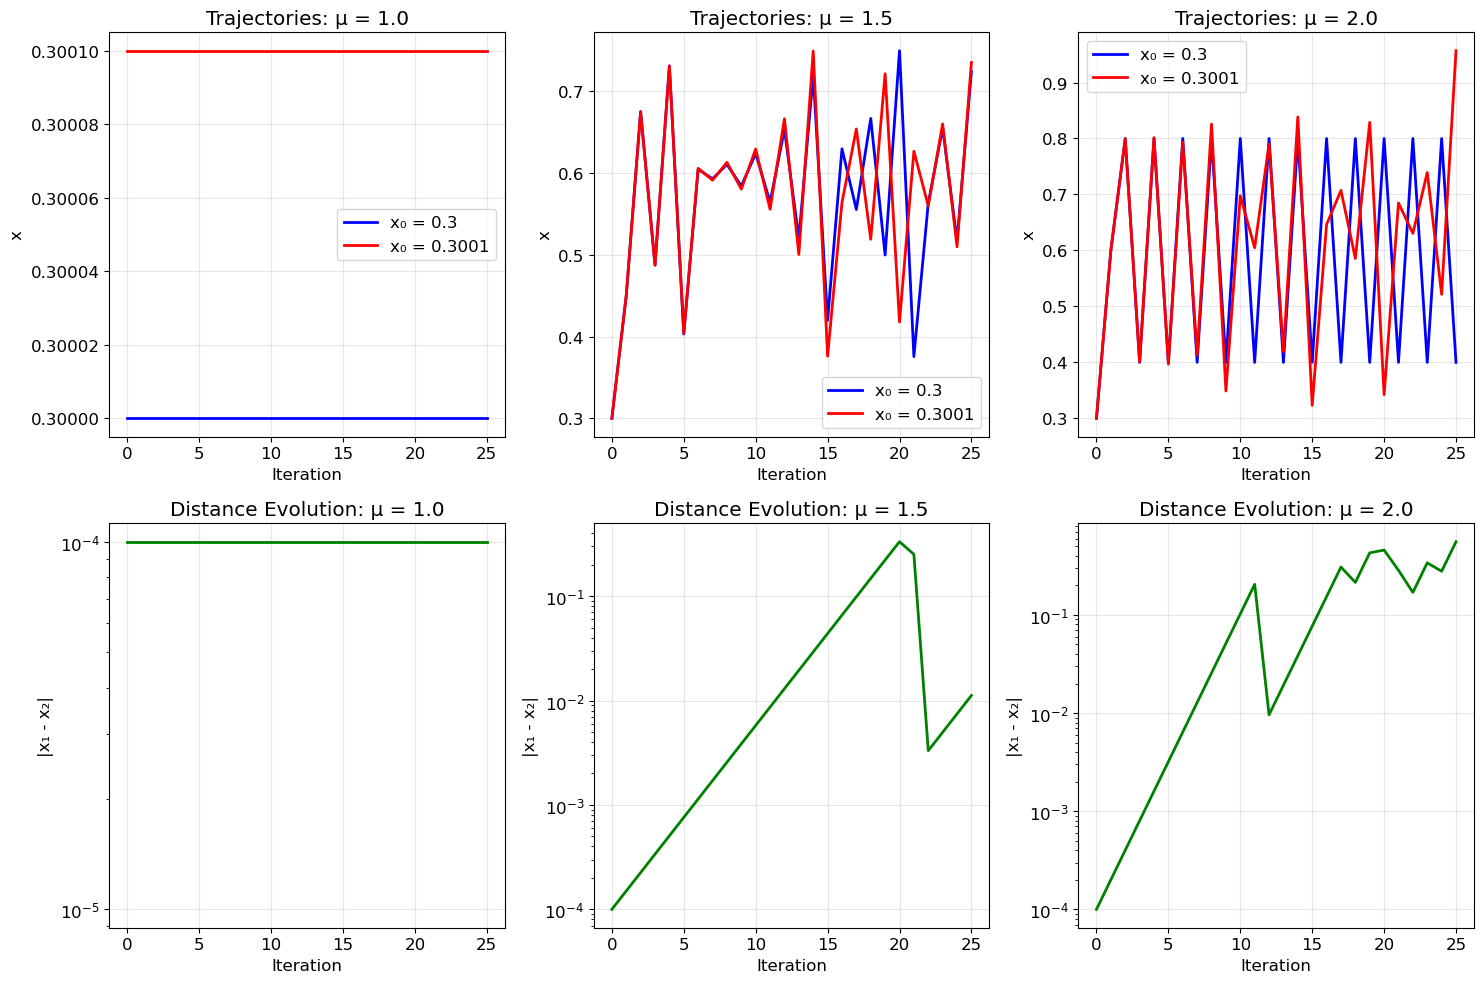

In [12]:
def sensitivity_analysis(mu, x0_1, x0_2, n_iterations=30):
    """
    Analyze sensitivity to initial conditions
    """
    traj1 = iterate_tent_map(x0_1, mu, n_iterations)
    traj2 = iterate_tent_map(x0_2, mu, n_iterations)
    
    distance = np.abs(traj1 - traj2)
    
    return traj1, traj2, distance

# Test sensitivity for different parameter values
mu_test = [1.0, 1.5, 2.0]
x0_1 = 0.3
x0_2 = 0.3001  # Very close initial condition

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, mu in enumerate(mu_test):
    traj1, traj2, distance = sensitivity_analysis(mu, x0_1, x0_2, 25)
    
    # Plot trajectories
    axes[0, i].plot(traj1, 'b-', label=f'x₀ = {x0_1}', linewidth=2)
    axes[0, i].plot(traj2, 'r-', label=f'x₀ = {x0_2}', linewidth=2)
    axes[0, i].set_title(f'Trajectories: μ = {mu}')
    axes[0, i].set_xlabel('Iteration')
    axes[0, i].set_ylabel('x')
    axes[0, i].legend()
    axes[0, i].grid(True, alpha=0.3)
    
    # Plot distance evolution
    axes[1, i].semilogy(distance, 'g-', linewidth=2)
    axes[1, i].set_title(f'Distance Evolution: μ = {mu}')
    axes[1, i].set_xlabel('Iteration')
    axes[1, i].set_ylabel('|x₁ - x₂|')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Summary and Mathematical Insights

The tent map demonstrates several key concepts in dynamical systems:

1. **Fixed Points**: The system has fixed points at $x = 0$ and $x = \frac{\mu}{\mu + 1}$

2. **Stability**: 
   - For $\mu < 1$: The fixed point at $x = 0$ is stable
   - For $\mu > 1$: The system becomes chaotic

3. **Lyapunov Exponent**: 
   - $\lambda = \ln(\mu)$ for $\mu \geq 1$
   - Positive Lyapunov exponent indicates chaos

4. **Bifurcations**: The tent map exhibits a transcritical bifurcation at $\mu = 1$

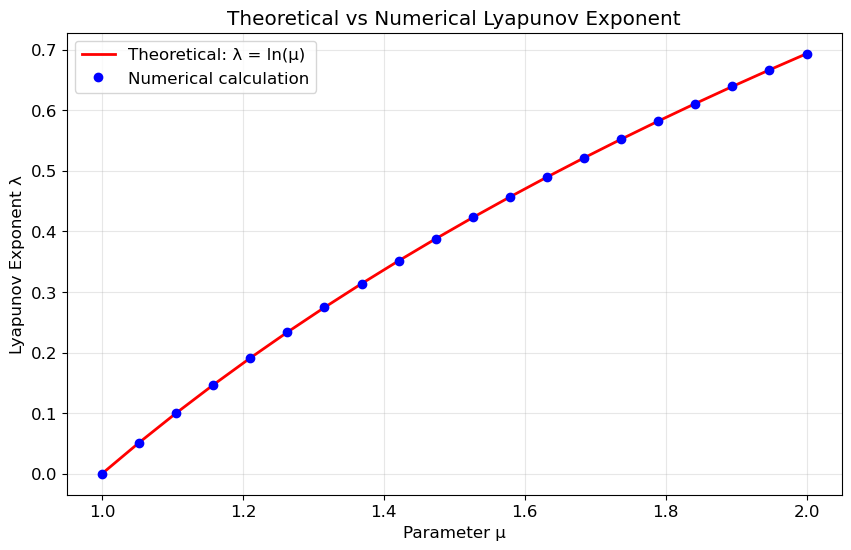

The tent map provides an exact analytical example where:
- Chaos occurs for μ > 1
- Lyapunov exponent λ = ln(μ) for μ ≥ 1
- The system is exactly solvable despite being chaotic


In [13]:
# Theoretical vs numerical Lyapunov exponent comparison
mu_theory = np.linspace(1.0, 2.0, 20)
lambda_theory = np.log(mu_theory)
lambda_numerical = [lyapunov_exponent(mu) for mu in mu_theory]

plt.figure(figsize=(10, 6))
plt.plot(mu_theory, lambda_theory, 'r-', linewidth=2, label='Theoretical: λ = ln(μ)')
plt.plot(mu_theory, lambda_numerical, 'bo', markersize=6, label='Numerical calculation')
plt.xlabel('Parameter μ')
plt.ylabel('Lyapunov Exponent λ')
plt.title('Theoretical vs Numerical Lyapunov Exponent')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("The tent map provides an exact analytical example where:")
print(f"- Chaos occurs for μ > 1")
print(f"- Lyapunov exponent λ = ln(μ) for μ ≥ 1")
print(f"- The system is exactly solvable despite being chaotic")